In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split,GridSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [2]:
df=pd.read_csv("/content/credit_risk.csv")

In [3]:
df

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,32576,57,53000,MORTGAGE,1.0,PERSONAL,5800,13.16,0,0.11,N,30
32577,32577,54,120000,MORTGAGE,4.0,PERSONAL,17625,7.49,0,0.15,N,19
32578,32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,35000,10.99,1,0.46,N,28
32579,32579,56,150000,MORTGAGE,5.0,PERSONAL,15000,11.48,0,0.10,N,26


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              32581 non-null  int64  
 1   Age             32581 non-null  int64  
 2   Income          32581 non-null  int64  
 3   Home            32581 non-null  object 
 4   Emp_length      31686 non-null  float64
 5   Intent          32581 non-null  object 
 6   Amount          32581 non-null  int64  
 7   Rate            29465 non-null  float64
 8   Status          32581 non-null  int64  
 9   Percent_income  32581 non-null  float64
 10  Default         32581 non-null  object 
 11  Cred_length     32581 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 3.0+ MB


In [35]:
df.shape

(32409, 11)

In [36]:
df.describe()

,Age,Income,Emp_length,Amount,Rate,Status,Percent_income,Cred_length
count,32409.000000,3.240900e+04,31522.000000,32409.000000,29315.000000,32409.000000,32409.000000,32409.000000
mean,27.730754,6.589428e+04,4.782850,9592.486655,11.017099,0.218705,0.170248,5.811194
std,6.210445,5.251787e+04,4.037343,6320.885127,3.241718,0.413374,0.106785,4.057899
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12250.000000,13.470000,0.000000,0.230000,8.000000
max,94.000000,2.039784e+06,41.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [37]:
df.dtypes

Age                 int64
Income              int64
Home               object
Emp_length        float64
Intent             object
Amount              int64
Rate              float64
Status              int64
Percent_income    float64
Default            object
Cred_length         int64
dtype: object

In [38]:
df.head()

,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
1,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
2,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
3,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4
4,21,9900,OWN,2.0,VENTURE,2500,7.14,1,0.25,N,2


In [39]:
df.tail()

,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
32404,57,53000,MORTGAGE,1.0,PERSONAL,5800,13.16,0,0.11,N,30
32405,54,120000,MORTGAGE,4.0,PERSONAL,17625,7.49,0,0.15,N,19
32406,65,76000,RENT,3.0,HOMEIMPROVEMENT,35000,10.99,1,0.46,N,28
32407,56,150000,MORTGAGE,5.0,PERSONAL,15000,11.48,0,0.10,N,26
32408,66,42000,RENT,2.0,MEDICAL,6475,9.99,0,0.15,N,30


#Data PreProcessing

In [40]:
df.columns

Index(['Age', 'Income', 'Home', 'Emp_length', 'Intent', 'Amount', 'Rate',
       'Status', 'Percent_income', 'Default', 'Cred_length'],
      dtype='object')

In [41]:
df.nunique()

Age                 56
Income            4294
Home                 4
Emp_length          35
Intent               6
Amount             753
Rate               348
Status               2
Percent_income      77
Default              2
Cred_length         29
dtype: int64

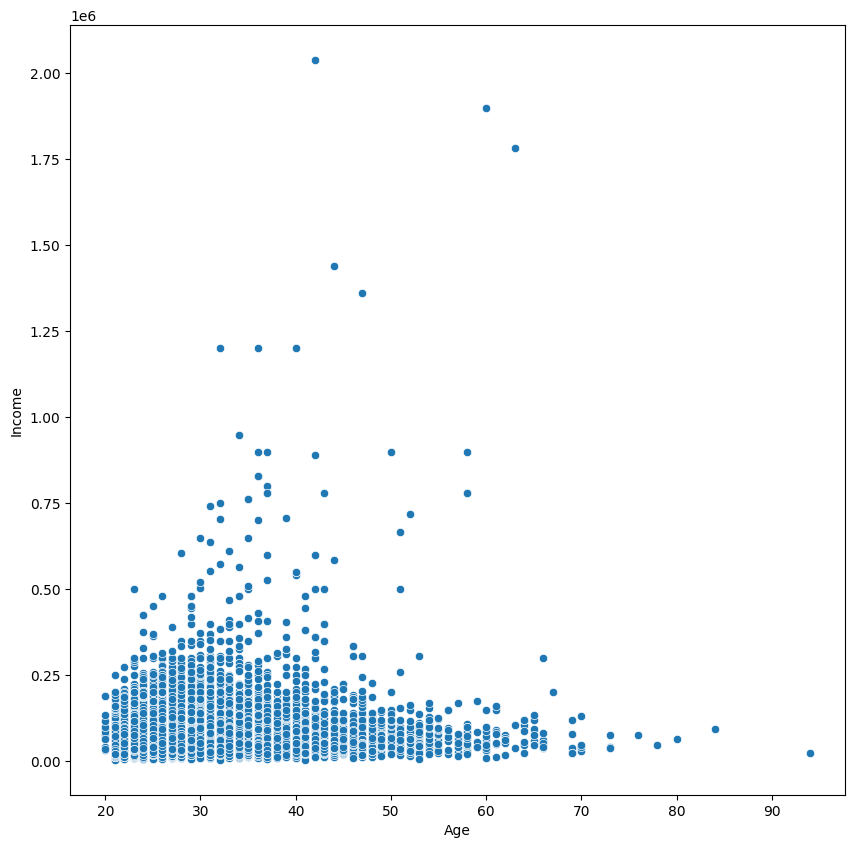

In [43]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = "Age" , y = "Income" , data = df)
plt.show()

<ipython-input-44-45373eda9e4c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "Rate" , y = "Default" , data = df , palette = "Set2")


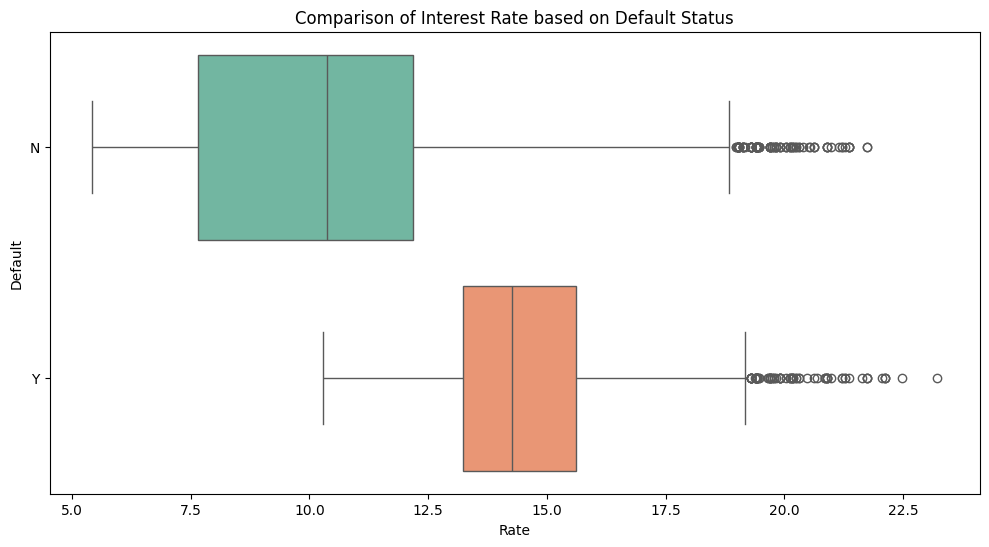

In [44]:
plt.figure(figsize = (12,6))
sns.boxplot(x = "Rate" , y = "Default" , data = df , palette = "Set2")
plt.title("Comparison of Interest Rate based on Default Status")
plt.show()

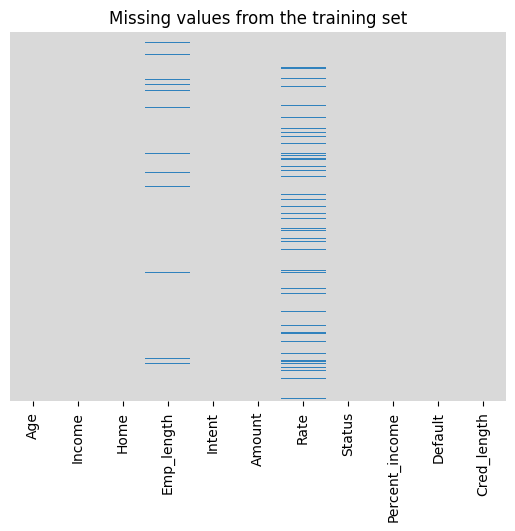

In [45]:
#Heatmap
sns.heatmap(df.isnull() , yticklabels = False , cbar = False , cmap = 'tab20c_r')
plt.title("Missing values from the training set")
plt.show()

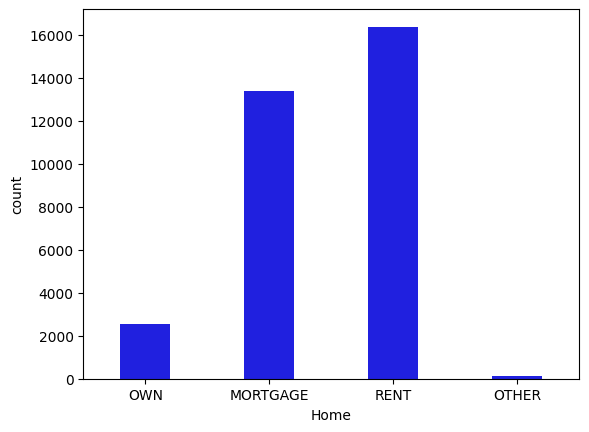

In [46]:
sns.countplot(x='Home',data=df,width=0.4,color='blue')
plt.show()

Text(0.5, 1.0, 'Age Distribution')

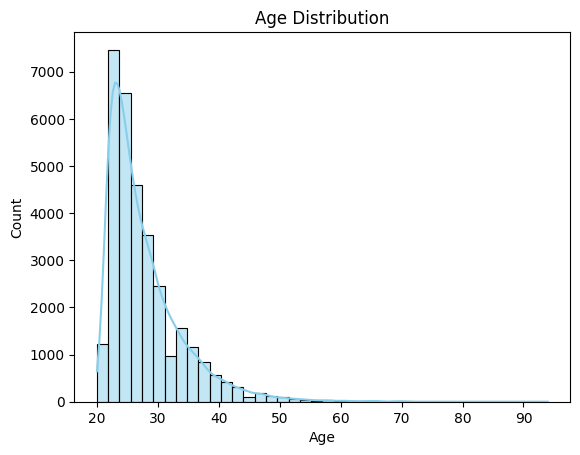

In [48]:
sns.histplot(df.Age, bins=40, kde=True, color='skyblue')
plt.title("Age Distribution")

<ipython-input-50-2af0fb54c9bd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="viridis")


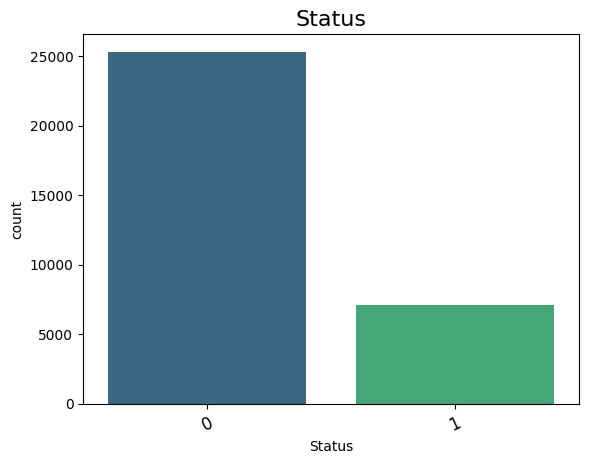

<ipython-input-50-2af0fb54c9bd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="viridis")


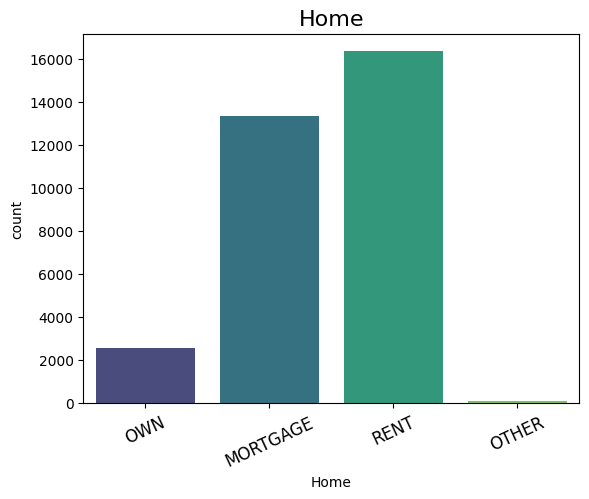

<ipython-input-50-2af0fb54c9bd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="viridis")


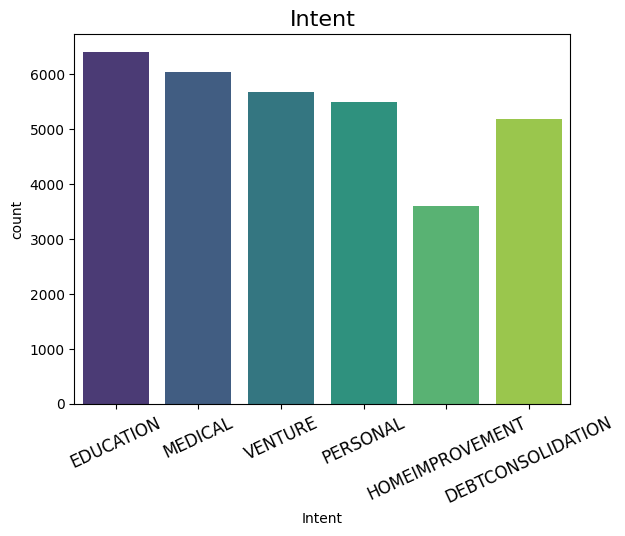

<ipython-input-50-2af0fb54c9bd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="viridis")


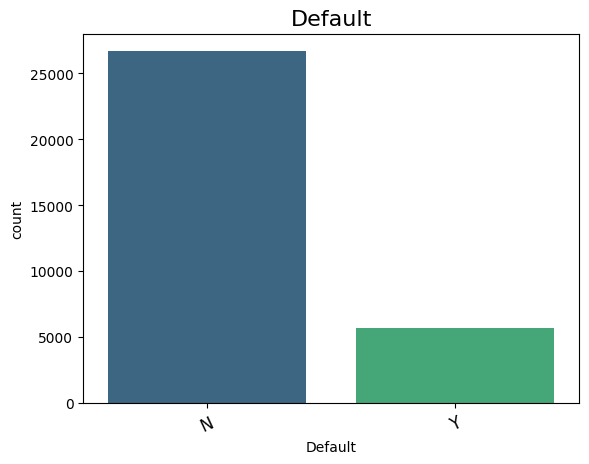

In [50]:
count_cols = ["Status", "Home", "Intent", "Default"]
for col in count_cols:
    sns.countplot(x=df[col], palette="viridis")
    plt.title(col, fontsize=16)
    plt.xticks(rotation=25, fontsize=12)
    plt.show()

In [5]:
df.drop(columns=["Id"],axis=1, inplace = True)

In [6]:
#Dropping duplicate values
df.drop_duplicates(inplace=True)
df = df.reset_index(drop=True)#Resetting the index to make it continuous

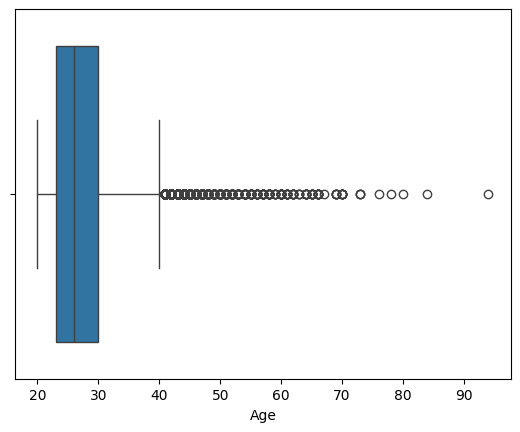

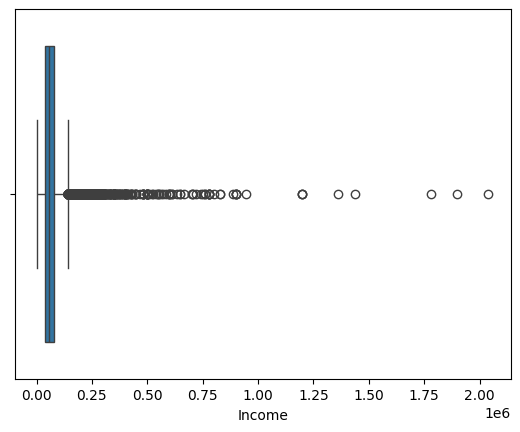

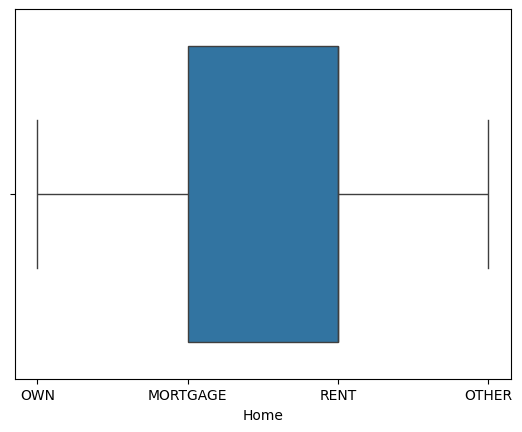

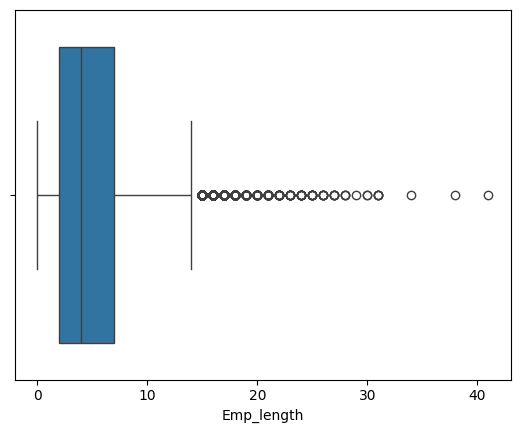

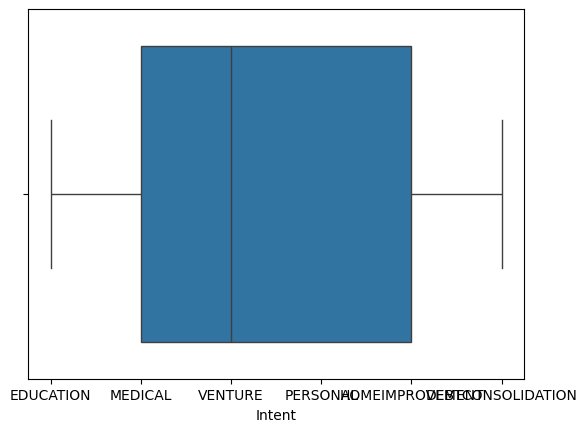

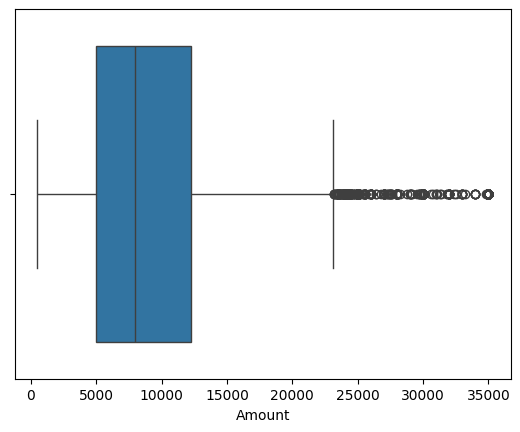

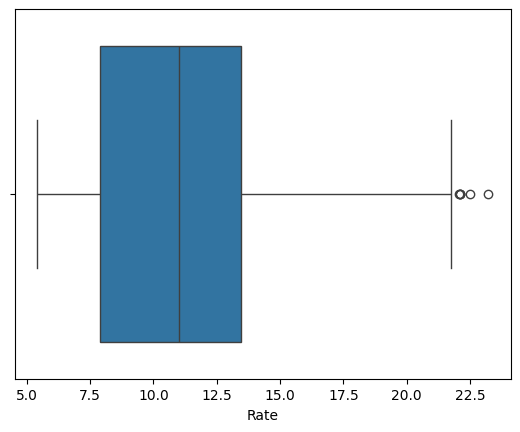

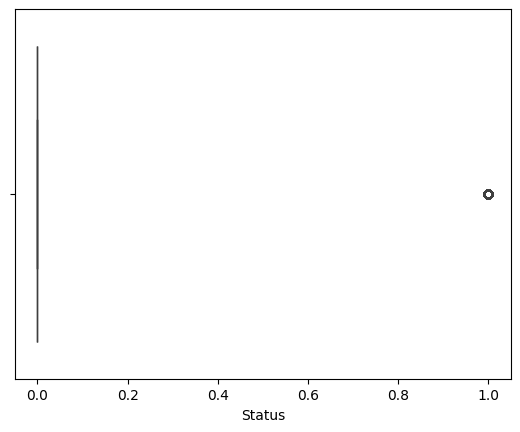

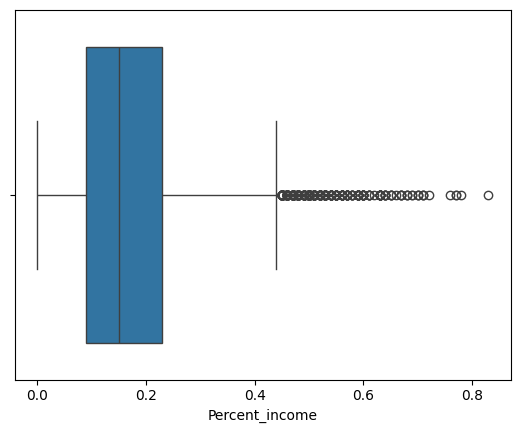

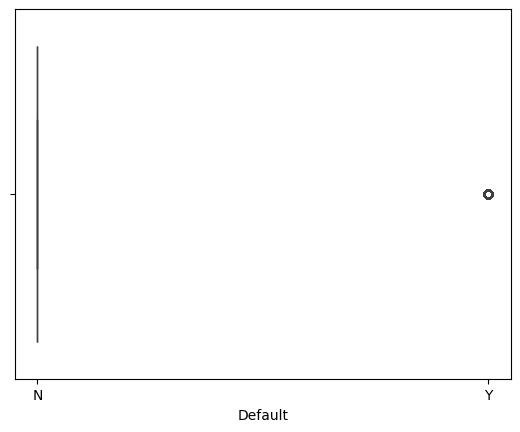

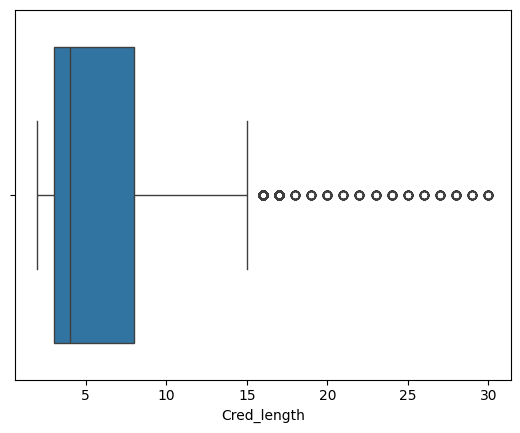

In [53]:
for outliers in df.columns:
  plt.figure()
  sns.boxplot(x = outliers , data = df)

In [7]:
max_ages = (df.Age > 99) | (df.Emp_length > 90)
max_ages = df[max_ages]
print(f"Total rows:{len(max_ages)}")
max_ages

Total rows:7


,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
81,144,250000,RENT,4.0,VENTURE,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,6000,11.86,0,0.03,N,2
210,21,192000,MORTGAGE,123.0,VENTURE,20000,6.54,0,0.10,N,4
575,123,80004,RENT,2.0,EDUCATION,20400,10.25,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,20000,NaN,0,0.26,N,4
32132,144,6000000,MORTGAGE,12.0,PERSONAL,5000,12.73,0,0.00,N,25


In [8]:
rows_to_drop = max_ages.index
df.drop(rows_to_drop, inplace = True)
df = df.reset_index(drop=True)
df.shape

(32409, 11)

In [9]:
X = df.drop(columns=["Status"])
Y = df["Status"]

In [10]:
X_train,X_val,y_train,y_val = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train.shape,y_train.shape,X_val.shape,y_val.shape

((25927, 10), (25927,), (6482, 10), (6482,))

In [11]:
num_cols = X_train.select_dtypes(include=["int64","float64"]).columns
catg_cols = X_train.select_dtypes(include=["object"]).columns

In [12]:
def transformers():
    numerical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values with mean imputation
    ('scaler', MinMaxScaler())                  # Feature scaling
        ])
    categorical_transformer = Pipeline([
    ('onehot',  OneHotEncoder(handle_unknown='ignore', drop='first'))
        ])
    preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_cols),
        ('cat', categorical_transformer, catg_cols)
        ])
    return preprocessor
preprocessor=transformers()


In [54]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

def pipeline_master(preprocessor):
    # XGBoostClassifier
    xgb_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('xgb', XGBClassifier())
    ])

    # RandomForestClassifier
    rfc_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('rf', RandomForestClassifier(random_state=42))
    ])

    # Logistic Regression
    log_reg_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('log_reg', LogisticRegression())
    ])

    # Support Vector Machine (SVM)
    svm_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('svm', SVC())
    ])

    # K-Nearest Neighbors (KNN)
    knn_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('knn', KNeighborsClassifier())
    ])

    # Gradient Boosting Classifier
    gb_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('gb', GradientBoostingClassifier())
    ])

    return xgb_pipeline, rfc_pipeline, log_reg_pipeline, svm_pipeline, knn_pipeline, gb_pipeline

xgb_pipeline, rfc_pipeline, log_reg_pipeline, svm_pipeline, knn_pipeline, gb_pipeline = pipeline_master(preprocessor=preprocessor)


In [14]:
log_model=log_reg_pipeline.fit(X_train,y_train)

In [15]:
y_pred_log=log_model.predict(X_val)

In [16]:
accuracy_score(y_pred_log,y_val)

0.8474236346806541

In [17]:
def gridcvSearching(pipeline,params):
    grid_cv = GridSearchCV(pipeline, params, scoring="recall", cv=5)
    return grid_cv

In [18]:
# Testing different parameters for Gradient Boosting
param_xgb  = {
    'xgb__learning_rate': [0.07,0.1,0.15],  # Learning rate
    'xgb__n_estimators': [300,700,1000],    # Number of estimators (trees)
    'xgb__reg_alpha': [0.05,0.1,1.0]        # L1 Regularization(Lasso)
}


xgb_pipeline_grid=gridcvSearching(xgb_pipeline,param_xgb)


In [19]:
def fitting_grids(grid_cv,x_train,y_train):
    grid_cv.fit(x_train,y_train)
    best_params = grid_cv.best_params_
    return best_params



In [20]:
best_params_xgb=fitting_grids(xgb_pipeline_grid,X_train,y_train)


In [21]:
best_params_xgb

{'xgb__learning_rate': 0.15, 'xgb__n_estimators': 1000, 'xgb__reg_alpha': 1.0}

In [22]:
xgb_pipeline_grid.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['Age', 'Income', 'Emp_length', 'Amount', 'Rate', 'Percent_income',
       'Cred_length'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  Index(['Home', 'Inte...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.15,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=1000, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [23]:
# XGBoostClassifier
best_xgbc_pipeline = xgb_pipeline_grid.best_estimator_
best_xgbc_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['Age', 'Income', 'Emp_length', 'Amount', 'Rate', 'Percent_income',
       'Cred_length'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  Index(['Home', 'Inte...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.15,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=1000, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [24]:
rfc_model=rfc_pipeline.fit(X_train,y_train)

In [25]:
rfc_pred=rfc_model.predict(X_val)

In [26]:
accuracy_score(rfc_pred,y_val)

0.9211663066954644

In [27]:
xgb_model=best_xgbc_pipeline.fit(X_train,y_train)

In [28]:
pred=xgb_model.predict(X_val)

In [29]:
accuracy_score(pred,y_val)

0.9256402344955261

#**SVM**

In [55]:
svm_model = svm_pipeline.fit(X_train, y_train)

In [56]:
svm_pred = svm_model.predict(X_val)

In [57]:
svm_accuracy = accuracy_score(svm_pred, y_val)

#**K-Nearest Neighbors (KNC)**

In [58]:
knc_model = knn_pipeline.fit(X_train, y_train)

In [59]:
knc_pred = knc_model.predict(X_val)

In [60]:
knc_accuracy = accuracy_score(knc_pred, y_val)

#**Gradient Boosting (GB)**

In [61]:
gb_model = gb_pipeline.fit(X_train, y_train)

In [62]:
gb_pred = gb_model.predict(X_val)

In [63]:
gb_accuracy = accuracy_score(gb_pred, y_val)

In [64]:
def pred_eval(model,pred_set,target):

    model_pred = model.predict(pred_set)

    conf_matrix = confusion_matrix(target,model_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    plt.show()

    accuracy = accuracy_score(target,model_pred)
    classification_rep = classification_report(target,model_pred)
    print("Accuracy:", accuracy)
    print("Classification Report:\n", classification_rep)

### Evaluating Random Forest


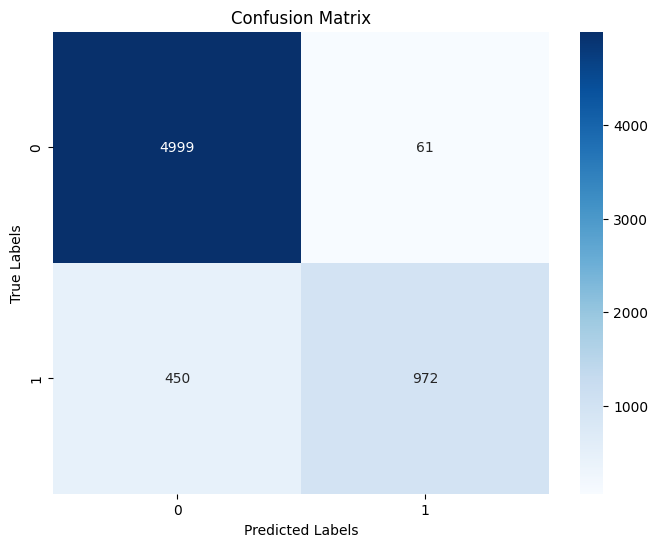

Accuracy: 0.9211663066954644
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95      5060
           1       0.94      0.68      0.79      1422

    accuracy                           0.92      6482
   macro avg       0.93      0.84      0.87      6482
weighted avg       0.92      0.92      0.92      6482



In [31]:
pred_eval(rfc_model,X_val,y_val)

### Evaluating XGBoost


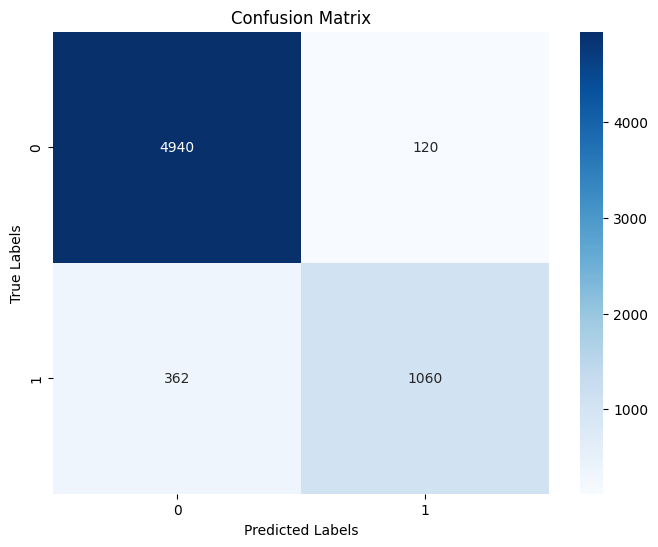

Accuracy: 0.9256402344955261
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95      5060
           1       0.90      0.75      0.81      1422

    accuracy                           0.93      6482
   macro avg       0.92      0.86      0.88      6482
weighted avg       0.92      0.93      0.92      6482



In [32]:
pred_eval(xgb_model,X_val,y_val)

###Evaluating SVM

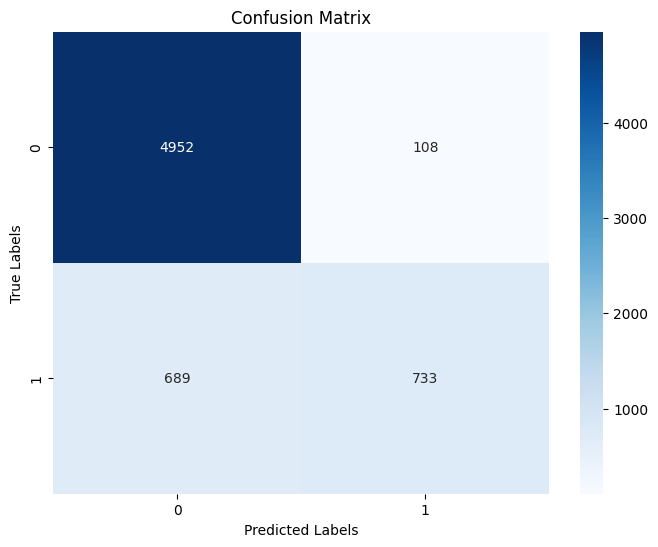

Accuracy: 0.877044122184511
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93      5060
           1       0.87      0.52      0.65      1422

    accuracy                           0.88      6482
   macro avg       0.87      0.75      0.79      6482
weighted avg       0.88      0.88      0.86      6482



In [65]:
pred_eval(svm_model, X_val, y_val)

###Evaluating K-Nearest Neighbors

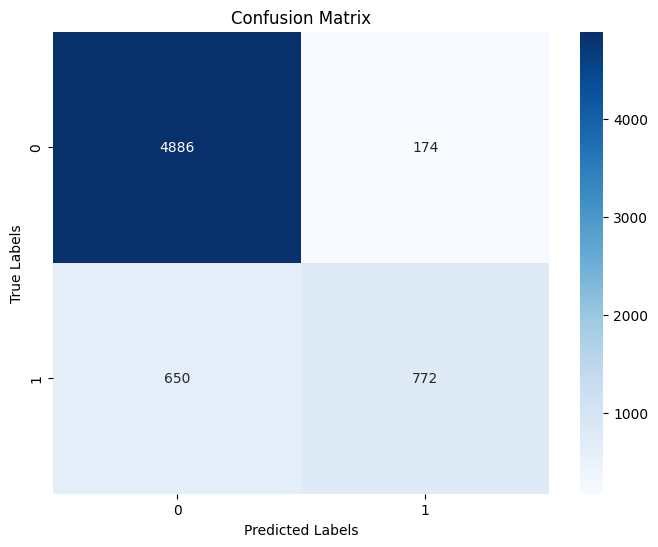

Accuracy: 0.8728787411292811
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      5060
           1       0.82      0.54      0.65      1422

    accuracy                           0.87      6482
   macro avg       0.85      0.75      0.79      6482
weighted avg       0.87      0.87      0.86      6482



In [66]:
pred_eval(knc_model, X_val, y_val)

###Evaluating Gradient Boosting

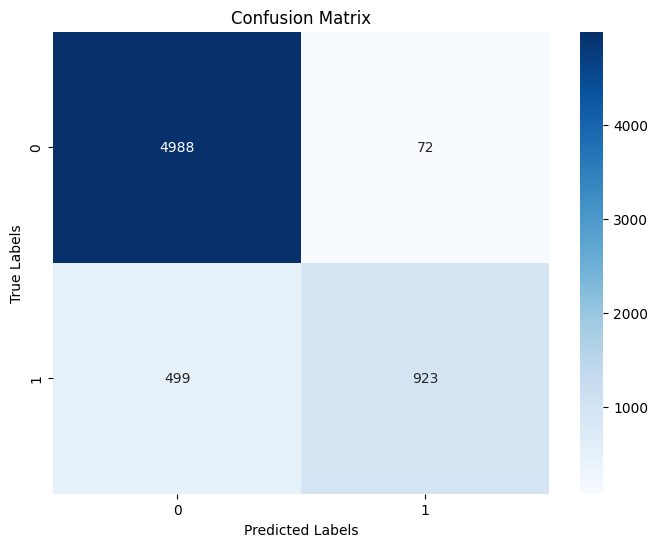

Accuracy: 0.9119099043505091
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      5060
           1       0.93      0.65      0.76      1422

    accuracy                           0.91      6482
   macro avg       0.92      0.82      0.85      6482
weighted avg       0.91      0.91      0.91      6482



In [67]:
pred_eval(gb_model, X_val, y_val)

In [1]:
import pickle
#models\model.pkl
with open('xgb_model.pkl','wb') as file:
    pickle.dump(xgb_model,file) 